In [1]:
import numpy as np
from functools import *
from itertools import *
from operator import *
from random import *
from multiprocessing import Pool
from defs import *
import csv

https://www.wikiwand.com/en/Standard_deviation#/Rapid_calculation_methods


In [2]:
filename = 'data5.csv'

def processDataFile(filename):
    
    x = np.zeros(0)
    try:
        with open(filename, newline ='') as csvfile:
            reader = csv.reader(csvfile,delimiter=',')
            n = 0
            n_robot = 1
            data = []
            for row in reader:
                if n==0: print(row)
                if n !=0:
                    y = [float(f) for f in row]
                    data.append(y)
                n+=1
            x = np.array(data)
            print(x.shape)
    except:
        print("File not Found")

    return x

In [19]:
data = processDataFile(filename)

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total']
(80, 11)


In [5]:
import matplotlib
import matplotlib.pyplot as plt

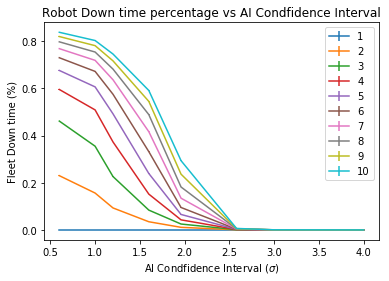

In [70]:
for n_robot in range(0,10):
    start = n_robot*8
    stop = start+8
    x = data[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = data[start:stop,3]
    std1 = data[start:stop,4]
    y2 = data[start:stop,5]
    std2 = data[start:stop,6]
    num_bot = int(data[start,1])

    #plt.plot(x,y1,'b-')
    plt.errorbar(x,y2,yerr = std2, fmt='-',label = f'{num_bot}')

plt.title('Robot Down time percentage vs AI Condfidence Interval')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Fleet Down time (%)')
plt.legend()
plt.show()

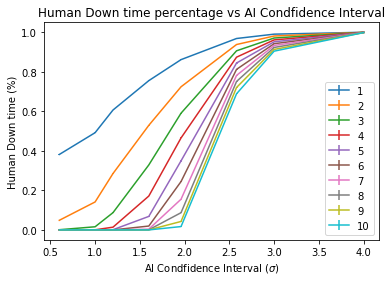

In [75]:
for n_robot in range(0,10):
    start = n_robot*8
    stop = start+8
    x = data[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = data[start:stop,3]
    std1 = data[start:stop,4]
    y2 = data[start:stop,5]
    std2 = data[start:stop,6]
    num_bot = int(data[start,1])

    plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
#plt.plot(x,y2,label = f'{num_bot}')#,'g-')

plt.title('Human Down time percentage vs AI Condfidence Interval')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Human Down time (%)')
plt.legend()
plt.show()

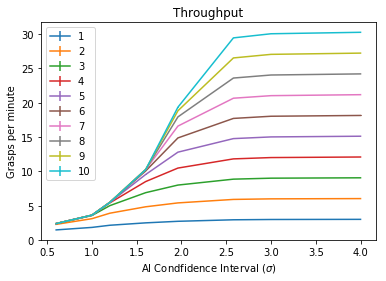

In [78]:
for n_robot in range(0,10):
    time = 30*24*60
    start = n_robot*8
    stop = start+8
    x = data[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = data[start:stop,9]/time
    std1 = data[start:stop,10]/time
    num_bot = int(data[start,1])
    #plt.plot(x,y1,label = f'{num_bot}')
    plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
#plt.plot(x,y2,label = f'{num_bot}')#,'g-')
plt.title('Throughput')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Grasps per minute')
plt.legend()
plt.show()

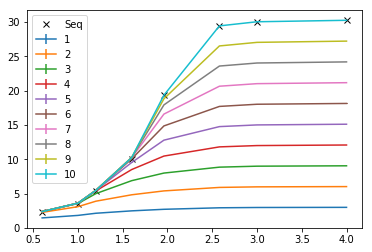

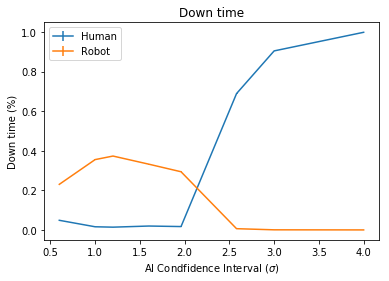

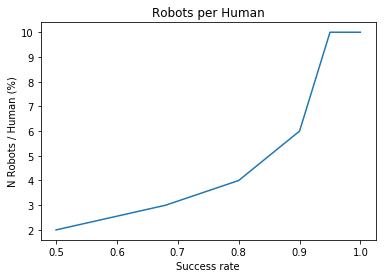

In [140]:
nbot = [2  ,3,4  ,6  ,10  ,10  ,10,10]
x =    [0.6,1,1.2,1.6,1.96,2.58,3 ,4]
time = 30*24*60
selected = []
for i in range(0,8):
    n_robot = nbot[i]
    
    point = (n_robot-1)*8+i
    selected.append( data[point] )
    #print(data[point])

nd = np.array(selected)
plt.figure(1)


for n_robot in range(0,10):
    time = 30*24*60
    start = n_robot*8
    stop = start+8
    x = data[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = data[start:stop,9]/time
    std1 = data[start:stop,10]/time
    num_bot = int(data[start,1])
    #plt.plot(x,y1,label = f'{num_bot}')
    plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    
plt.plot(x,nd[:,9]/time,'kx',label = 'Seq',)
plt.legend()


plt.figure(2)
plt.errorbar(x,nd[:,3],yerr=nd[:,4],label='Human')
plt.errorbar(x,nd[:,5],yerr=nd[:,6],label='Robot')
plt.title('Down time')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Down time (%)')
plt.legend()
plt.show()

ps = [0.5,0.68,0.8,0.9,0.95,0.99,0.997,0.99994]

plt.figure(3)
plt.plot(ps,nbot)
plt.title('Robots per Human')
plt.xlabel(r'Success rate')
plt.ylabel('N Robots / Human (%)')
plt.show()

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

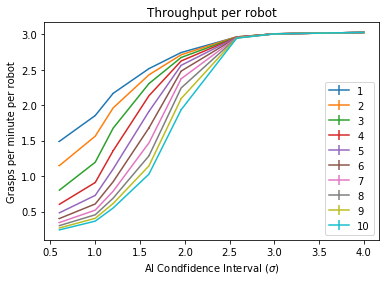

In [99]:
for n_robot in range(0,10):
    time = 30*24*60
    start = n_robot*8
    stop = start+8
    num_bot = int(data[start,1])
    x = data[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = data[start:stop,9]/time/num_bot
    std1 = data[start:stop,10]/time/num_bot
    
    #plt.plot(x,y1,label = f'{num_bot}')
    plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
#plt.plot(x,y2,label = f'{num_bot}')#,'g-')
plt.title('Throughput per robot')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Grasps per minute per robot')
plt.legend()
plt.show()

In [103]:
p=10/3
print(f'{p}:'+"{0:.2f}".format(p))

3.3333333333333335:3.33


In [141]:
filename = 'merge56.csv'

In [149]:
fulldata = processDataFile(filename)

['n_humans', 'n_robots', 'p_robot', 'mean Human Down', ' stdev human down', 'mean robot Down', ' stdev robot down', 'Success rate', 'stdev successrate', 'n_total', '']
(152, 11)


In [150]:
fulldata[-1,1]

19.0

In [155]:
def plotRobotDown(data,dolegend=False):
    totalbot = int(fulldata[-1,1])
    for n_robot in range(0,totalbot):
        start = n_robot*8
        stop = start+8
        x = data[start:stop,2]
        x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
        #x=list(range(0,8))
        y1 = data[start:stop,3]
        std1 = data[start:stop,4]
        y2 = data[start:stop,5]
        std2 = data[start:stop,6]
        num_bot = int(data[start,1])

        #plt.plot(x,y1,'b-')
        plt.errorbar(x,y2,yerr = std2, fmt='-',label = f'{num_bot}')

    plt.title('Robot Down time percentage vs AI Condfidence Interval')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Fleet Down time (%)')
    if dolegend: plt.legend()
    plt.show()

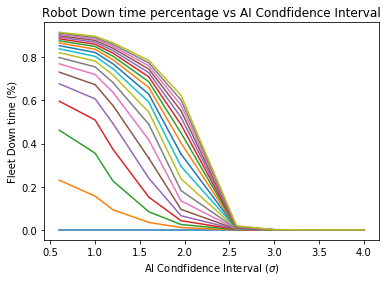

In [156]:
plotRobotDown(fulldata)

In [159]:
def plotHumanDown(data,dolegend=False):
    totalbot = int(fulldata[-1,1])
    for n_robot in range(0,totalbot):
        start = n_robot*8
        stop = start+8
        x = data[start:stop,2]
        x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
        #x=list(range(0,8))
        y1 = data[start:stop,3]
        std1 = data[start:stop,4]
        y2 = data[start:stop,5]
        std2 = data[start:stop,6]
        num_bot = int(data[start,1])

        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    #plt.plot(x,y2,label = f'{num_bot}')#,'g-')

    plt.title('Human Down time percentage vs AI Condfidence Interval')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Human Down time (%)')
    if dolegend: plt.legend()
    plt.show()

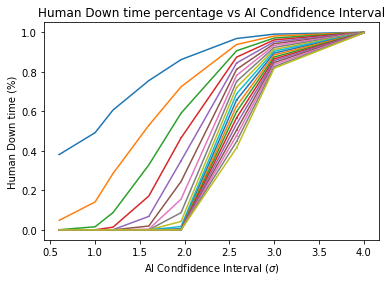

In [160]:
plotHumanDown(fulldata)

In [164]:
def plotThroughput(data,dolegend=False):
    totalbot = int(fulldata[-1,1])
    time = 30*24*60
    for n_robot in range(0,totalbot):
        start = n_robot*8
        stop = start+8
        x = data[start:stop,2]
        x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
        #x=list(range(0,8))
        y1 = data[start:stop,9]/time
        std1 = data[start:stop,10]/time
        num_bot = int(data[start,1])
        #plt.plot(x,y1,label = f'{num_bot}')
        plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    #plt.plot(x,y2,label = f'{num_bot}')#,'g-')
    plt.title('Throughput')
    plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
    plt.ylabel('Grasps per minute')
    if dolegend: plt.legend()
    plt.show()

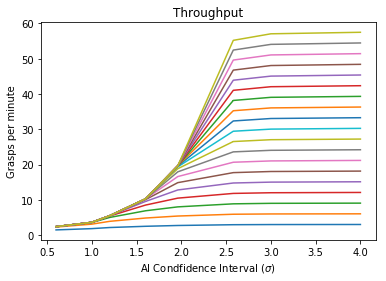

In [165]:
plotThroughput(fulldata)

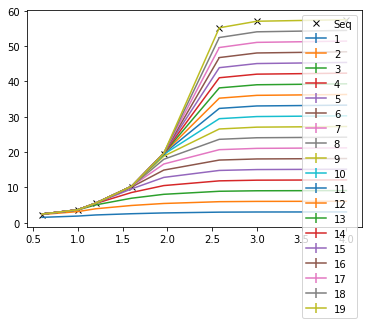

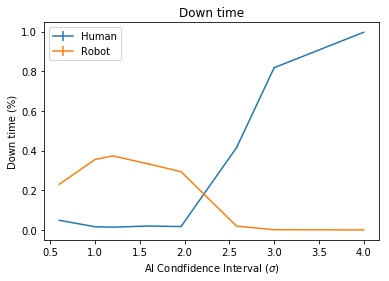

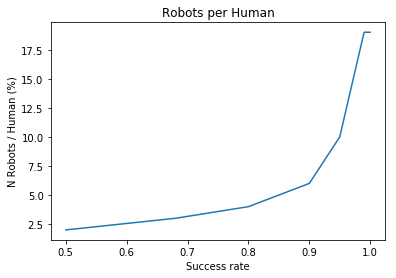

In [170]:
nbot = [2  ,3,4  ,6  ,10  ,19  ,19,19]
x =    [0.6,1,1.2,1.6,1.96,2.58,3 ,4]
time = 30*24*60
selected = []
for i in range(0,8):
    n_robot = nbot[i]
    
    point = (n_robot-1)*8+i
    selected.append( fulldata[point] )
    #print(data[point])

nd = np.array(selected)
plt.figure(1)


for n_robot in range(0,19):
    time = 30*24*60
    start = n_robot*8
    stop = start+8
    x = fulldata[start:stop,2]
    x = [0.6,1   ,1.2,1.6,1.96,2.58,3    ,4]
    #x=list(range(0,8))
    y1 = fulldata[start:stop,9]/time
    std1 = fulldata[start:stop,10]/time
    num_bot = int(fulldata[start,1])
    #plt.plot(x,y1,label = f'{num_bot}')
    plt.errorbar(x,y1,yerr = std1,label = f'{num_bot}')
    
plt.plot(x,nd[:,9]/time,'kx',label = 'Seq',)
plt.legend()


plt.figure(2)
plt.errorbar(x,nd[:,3],yerr=nd[:,4],label='Human')
plt.errorbar(x,nd[:,5],yerr=nd[:,6],label='Robot')
plt.title('Down time')
plt.xlabel(r'AI Condfidence Interval ($\sigma$)')
plt.ylabel('Down time (%)')
plt.legend()
plt.show()

ps = [0.5,0.68,0.8,0.9,0.95,0.99,0.997,0.99994]

plt.figure(3)
plt.plot(ps,nbot)
plt.title('Robots per Human')
plt.xlabel(r'Success rate')
plt.ylabel('N Robots / Human')
plt.show()

In [184]:
import scipy
from scipy import special
import math

In [189]:
def Phi(z):
    return 1/2*(1 + special.erf(z/math.sqrt(2)))

In [190]:
Phi(2)

0.97724986805182079

In [176]:
from scipy import special

In [208]:
y= [0.5+x/2.0 for x in range(0,7)]

In [209]:
z = [Phi(x) for x in y]

In [210]:
print(z)

[0.69146246127401301, 0.84134474606854293, 0.93319279873114191, 0.97724986805182079, 0.99379033467422384, 0.9986501019683699, 0.99976737092096446]


In [207]:
Phi(3.5)

0.99976737092096446